In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, MaxPool1D

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [22]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [24]:
#Data Preprocessing, Feature Engineering and transformation
# checking the shape of the data

train.shape, test.shape

((76020, 371), (75818, 370))

In [25]:
# checking for null values
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

In [26]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [27]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [28]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.43,6.00,4.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.55,3.00,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57.00,51.45,66.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.87,30.00,21.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [29]:
# Let's remove ID column from both datasets and target column from train to make it a seperate series
y_train_full=train['TARGET']
x_train_full=train.drop(['ID', 'TARGET'], axis=1)
x_test_final=test.drop(['ID'], axis=1)

In [30]:
# Checking shape before any action
x_train_full.shape, y_train_full.shape

((76020, 369), (76020,))

In [31]:
smt=SMOTE()
x_train_full, y_train_full = smt.fit_sample(x_train_full, y_train_full)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
x_train_full.shape, y_train_full.shape

((146024, 369), (146024,))

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [34]:
# checking the shape of the datasets
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_test_final.shape

((116819, 369), (116819,), (29205, 369), (29205,), (75818, 369))

In [35]:
#Feature selection methods: Filtering method
quasi_filter=VarianceThreshold(0.01)
x_train=quasi_filter.fit_transform(x_train)
x_test=quasi_filter.transform(x_test)
x_test_final=quasi_filter.transform(x_test_final)

In [36]:
x_train.shape, x_test.shape, x_test_final.shape

((116819, 260), (29205, 260), (75818, 260))

In [37]:
# Let's check duplicated features now

x_train_T=x_train.T
x_test_T = x_test.T
x_test_final_T=x_test_final.T

In [38]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)
x_test_final_T=pd.DataFrame(x_test_final_T)

In [39]:
x_train_T.shape, x_test_T.shape, x_test_final_T.shape

((260, 116819), (260, 29205), (260, 75818))

In [40]:
x_train_T.duplicated().sum()

15

In [41]:
duplicated_features=x_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
255    False
256    False
257    False
258    False
259    False
Length: 260, dtype: bool

In [42]:
# features to keep will be inverse of duplicatd features
features_to_keep=[not index for index in duplicated_features]

In [43]:
x_train=x_train_T[features_to_keep].T
x_test=x_test_T[features_to_keep].T
x_test_final=x_test_final_T[features_to_keep].T

In [44]:
x_train.shape, x_test.shape, x_test_final.shape

((116819, 245), (29205, 245), (75818, 245))

In [45]:
# Transformation of the data now

sc=StandardScaler()
x_train_tx=sc.fit_transform(x_train)
x_test_tx=sc.transform(x_test)
x_test_final_tx=sc.transform(x_test_final)

In [46]:
# let's check the type of the dataset now
type(x_train_tx), type(x_test_tx), type(y_train), type(y_test), type(x_test_final_tx)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [47]:
type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [48]:
x_train_tx=x_train_tx.reshape(x_train_tx.shape[0], x_train_tx.shape[1], 1)
x_test_tx=x_test_tx.reshape(x_test_tx.shape[0], x_test_tx.shape[1], 1)
x_test_final_tx=x_test_final_tx.reshape(x_test_final_tx.shape[0], x_test_final_tx.shape[1], 1)

In [49]:
x_train_tx[0].shape

(245, 1)

In [71]:
len(x_train.columns)

245

In [50]:
model=Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=x_train_tx[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.5))          

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.5))    
          
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 243, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 243, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 121, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 121, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 119, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 119, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 59, 64)           

In [62]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [63]:
history=model.fit(x_train_tx, y_train, validation_data=(x_test_tx, y_test), epochs=10, verbose=1)

Epoch 1/10
3651/3651 [==============================] - 165s 45ms/step - loss: 0.2766 - accuracy: 0.8842 - val_loss: 0.2739 - val_accuracy: 0.8900
Epoch 2/10
3651/3651 [==============================] - 164s 45ms/step - loss: 0.2777 - accuracy: 0.8830 - val_loss: 4.6783 - val_accuracy: 0.6498
Epoch 3/10
3651/3651 [==============================] - 164s 45ms/step - loss: 0.2736 - accuracy: 0.8844 - val_loss: 0.2610 - val_accuracy: 0.8922
Epoch 4/10
3651/3651 [==============================] - 159s 43ms/step - loss: 0.2744 - accuracy: 0.8853 - val_loss: 0.2801 - val_accuracy: 0.8930
Epoch 5/10
3651/3651 [==============================] - 160s 44ms/step - loss: 0.2718 - accuracy: 0.8858 - val_loss: 0.4760 - val_accuracy: 0.8002
Epoch 6/10
3651/3651 [==============================] - 158s 43ms/step - loss: 0.2724 - accuracy: 0.8858 - val_loss: 0.2595 - val_accuracy: 0.8898
Epoch 7/10
3651/3651 [==============================] - 163s 45ms/step - loss: 0.2715 - accuracy: 0.8870 - val_loss: 0

In [70]:
y_pred=model.predict(x_test_final_tx)

In [65]:
#y_pred.shape

(75818, 1)

In [66]:
y_pred

array([[0.29305986],
       [0.29566932],
       [0.0387432 ],
       ...,
       [0.11207885],
       [0.29985392],
       [0.08774823]], dtype=float32)

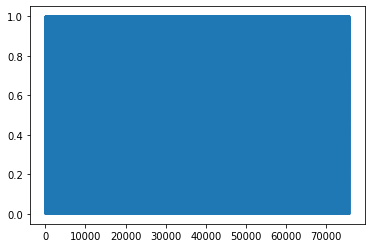

In [69]:
plt.plot(y_pred)

In [88]:
#model-2 
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(200, input_shape=x_train_tx[0].shape, activation="relu"),
                          keras.layers.Dense(150, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 245, 200)          400       
_________________________________________________________________
dense_1 (Dense)              (None, 245, 150)          30150     
_________________________________________________________________
dense_2 (Dense)              (None, 245, 1)            151       
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [92]:
history=model.fit(x_train_tx, y_train, validation_data=(x_test_tx, y_test), epochs=10, verbose=1)

Epoch 1/10
3651/3651 [==============================] - 177s 48ms/step - loss: 0.2489 - accuracy: 0.5096 - val_loss: 0.2488 - val_accuracy: 0.5068
Epoch 2/10
3651/3651 [==============================] - 179s 49ms/step - loss: 0.2489 - accuracy: 0.5091 - val_loss: 0.2489 - val_accuracy: 0.5101
Epoch 3/10
3651/3651 [==============================] - 180s 49ms/step - loss: 0.2489 - accuracy: 0.5092 - val_loss: 0.2488 - val_accuracy: 0.5100
Epoch 4/10
3651/3651 [==============================] - 177s 49ms/step - loss: 0.2488 - accuracy: 0.5095 - val_loss: 0.2487 - val_accuracy: 0.5103
Epoch 5/10
3651/3651 [==============================] - 171s 47ms/step - loss: 0.2488 - accuracy: 0.5089 - val_loss: 0.2488 - val_accuracy: 0.5100
Epoch 6/10
3651/3651 [==============================] - 170s 47ms/step - loss: 0.2488 - accuracy: 0.5115 - val_loss: 0.2487 - val_accuracy: 0.5103
Epoch 7/10
3651/3651 [==============================] - 171s 47ms/step - loss: 0.2488 - accuracy: 0.5103 - val_loss: 0

In [87]:
keras.backend.clear_session()